In [2]:
%load_ext autoreload
%autoreload 2

In [20]:
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("talk")
sns.set_style("whitegrid")

pd.options.display.max_columns = None
pd.set_option("display.max_columns", 100)

import matplotlib as mpl
import sys

sys.path.append("..")
from GSSP_utils.path_conf import loc_data_dir
from GSSP_utils.data_filtering import (
    _silent_recording_mask,
    _noisy_recording_mask,
    _silent_end_mask,
    _skip_id_mask,
    get_valid_audio_mask,
)
from GSSP_utils.conf import color_palette
from scipy.stats import mannwhitneyu, kstest, wilcoxon


# Speech feature visualization - **fixed duration** - `end`

In [4]:
# ------ Configure these parameters ------
DUR_S = 15
start = False

# load the required data
feat_path = loc_data_dir.joinpath(
    f"df_gemaps_{DUR_S}s_{'start' if start else 'end'}.parquet"
)
display(feat_path)
df_feat_tot = pd.read_parquet(feat_path, engine="fastparquet")
df_session = pd.read_parquet(
    loc_data_dir.joinpath("df_session_tot_cleaned_VAD.parquet")
)
print("df_feat_tot", df_feat_tot.shape)
print("df_session", df_session.shape)

# and merge the data
df_session_feat = df_feat_tot.merge(
    df_session, on=["ID", "DB", "pic_name", "time_str"], how="left"
)

del feat_path, df_session, df_feat_tot

print("silent recordings")
display(
    df_session_feat[_silent_recording_mask(df_session_feat)][
        ["ID", "pic_name", "time_str"]
    ]
)
print("skip ids")
display(df_session_feat[_skip_id_mask(df_session_feat)][["ID", "pic_name", "time_str"]])
print("noisy_recordings")
display(
    df_session_feat[_noisy_recording_mask(df_session_feat)][
        ["ID", "pic_name", "time_str"]
    ]
)

# mask for valid audio
df_session_feat = (
    df_session_feat[
        get_valid_audio_mask(df_session_feat) & ~_silent_end_mask(df_session_feat)
    ]
    .copy()
    .reset_index(drop=True)
)
print("df_session_feat masked", df_session_feat.shape)

# TODO
# df_session_feat = df_session_feat[
#     df_session_feat.ID != "20adc51f-8ef5-41a2-9297-8dc263b40221"
# ]
# df_session_feat = df_session_feat[
#     df_session_feat.ID != "aeacc3a4-754e-4cd3-9ce7-62a41147d637"
# ]

# add a speech_style column to df_session_feat
df_session_feat["speech_style"] = df_session_feat.DB.map(
    lambda x: {"marloes": "Read", "PiSCES": "GSSP", "Radboud": "GSSP"}.get(x)
)
df_session_feat.head(3)


PosixPath('/home/jonas/git/github/semi-guided-speech/notebooks/../loc_data/df_gemaps_15s_end.parquet')

df_feat_tot (2909, 69)
df_session (3257, 25)
silent recordings


,ID,pic_name,time_str


skip ids


,ID,pic_name,time_str


noisy_recordings


,ID,pic_name,time_str
11,099ceb4d-28f3-4b1f-8f8e-16b439a882f1,Rafd090_04_Caucasian_female_neutral_frontal,17:06:37
2486,d7fbc4b9-5f94-4639-b82b-6b1592b2ad3a,Rafd090_02_Caucasian_female_neutral_frontal,19:52:41
2487,d7fbc4b9-5f94-4639-b82b-6b1592b2ad3a,Rafd090_61_Caucasian_female_neutral_frontal,19:54:55
2488,d7fbc4b9-5f94-4639-b82b-6b1592b2ad3a,Rafd090_58_Caucasian_female_neutral_frontal,19:56:41
2489,d7fbc4b9-5f94-4639-b82b-6b1592b2ad3a,Picture 80,19:57:47
2555,e03516f6-1af7-4c72-ad49-41b6db4733d7,Rafd090_04_Caucasian_female_neutral_frontal,22:07:40


df_session_feat masked (2901, 90)


,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,pic_name,time_str,DB,ID,age,education,sex,timestamp,Marloes,PiSCES,Radboud,device,prolific_token,wav_size,wav_sample_rate,wav_duration_s,wav_timestamp,arousal,valence,DB_no,session_no,pic_no,VAD_sliced_duration_s,VAD_speech_start_s,VAD_speech_end_s,speech_style
0,/media/SPS/interim/speech_webapp/VAD_slice_16k...,0 days 00:00:07.619937,0 days 00:00:22.619937,33.850227,0.105944,33.023087,33.945721,36.165443,3.142357,156.227295,148.856659,59.767223,89.799194,0.411634,0.823039,0.138254,0.318644,0.635913,0.497660,7.496657,6.424032,5.612262,4.044155,0.024030,1.982259,1.090266,1.027343,9.756880,0.294931,10.838393,0.790265,33.285439,0.239357,636.770691,0.314765,1420.298706,0.172030,-127.095901,-0.686157,1734.699097,0.123768,-129.229721,-0.621258,2855.787109,0.089345,-133.240875,-0.567925,-23.481592,-0.281323,33.622211,0.250111,-0.009590,-3.039073,-0.024226,-0.631559,-19.825270,31.512363,-0.050495,0.002650,1.867912,2.677376,0.147250,0.113358,0.211282,0.214598,marloes,16:53:49,marloes,099ceb4d-28f3-4b1f-8f8e-16b439a882f1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Read
1,/media/SPS/interim/speech_webapp/VAD_slice_16k...,0 days 00:00:27.119875,0 days 00:00:42.119875,34.144611,0.121281,33.325859,34.103828,36.804985,3.479126,154.825546,133.919296,-4.529495,92.517975,0.426551,1.137881,0.139899,0.241362,0.648041,0.508142,24.400536,27.512356,10.089767,9.972820,0.018276,1.395683,0.802046,1.237693,9.974118,0.332859,9.906165,0.784347,38.745522,0.186030,621.794128,0.321318,1486.751831,0.163302,-154.427505,-0.506338,1683.470947,0.136229,-153.855423,-0.478497,2857.498779,0.077024,-157.560394,-0.429141,-25.020851,-0.266679,39.639919,0.160098,-0.012114,-2.364683,-0.025647,-0.646350,-24.964502,36.967163,-0.064576,-0.000620,1.400934,1.606426,0.162917,0.153310,0.438750,0.574509,Picture 132,16:54:45,PiSCES,099ceb4d-28f3-4b1f-8f8e-16b439a882f1,21.0,so,female,2022-06-27 16:42:13.679102+02:00,7.0,15.0,15.0,earphones,60f833d2fc774b09e3e09758,4251692.0,48000.0,44.29,2022-06-27 16:54:46+02:00,32.0,75.0,1.0,2.0,1.0

In [5]:
df_session_feat['ID'].nunique()

82

In [6]:
df_session_feat['DB'].value_counts()

PiSCES     1184
Radboud    1163
marloes     554
Name: DB, dtype: int64

# Visualizations

In [7]:
# non speech feature variables
id_vars = [
    "wav_duration_s",
    "file",
    "start",
    "end",
    "DB",
    "speech_style",
    "DB_no",
    "education",
    "timestamp",
    "time_str",
    "sex",
    "age",
    "Marloes",
    "PiSCES",
    "Radboud",
    "session_no",
    "ID",
    "wav_size",
    "device",
    "pic_name",
    "arousal",
    "valence",
    "pic_no",
    "prolific_token",
    "pic_count",
    "wav_timestamp",
    "wav_sample_rate",
    "VAD_speech_end_s",
    "VAD_speech_start_s",
    "VAD_sliced_duration_s",
    "group",
    "group_value",
]


In [8]:
def catplot_wrapped(feat_cols: List[str], df=df_session_feat, **kwargs):
    default_kwargs = dict(
        col_wrap=3,
        height=6,
        kind="box",
        palette="Set3",
        sharey=False,
        sharex="row",
        showfliers=False,
    )
    default_kwargs.update(kwargs)

    if "row" in default_kwargs:
        default_kwargs.pop("col_wrap")

    g = sns.catplot(
        data=pd.melt(
            frame=df,
            id_vars=list(set(id_vars).intersection(set(df.columns))),
            value_vars=feat_cols,
            value_name="value",
            var_name="variable",
        ),
        y="value",
        col="variable",
        **default_kwargs,
    )
    # remove the bottom spline and xlabels
    for ax in g.axes.flat:
        ax.spines.bottom.set_visible(False)
        ax.set_xlabel("")

    g.set_titles("{col_name}")
    plt.subplots_adjust(wspace=0.4, hspace=0.3)
    return g


def delta_catplot_wrapped(df_delta: pd.DataFrame, feat_cols: List[str], **kwargs):
    default_kwargs = dict(
        col_wrap=3,
        height=6,
        kind="violin",
        bw=0.3,
        palette="Set3",
        x="value",
        y="delta",
        sharex=False,
        inner="quartile",
        showfliers=False,
    )
    default_kwargs.update(kwargs)
    if default_kwargs["kind"] == "box":
        default_kwargs.pop("bw")
        default_kwargs.pop("inner")
    g = sns.catplot(
        data=df_delta.melt(id_vars=["delta"], value_vars=feat_cols, var_name="v"),
        col="v",
        **default_kwargs,
    )
    g.set_titles("{col_name}")

    # remove the bottom spline and x-labels
    for ax in g.axes.flat:
        ax.spines.bottom.set_visible(False)
        ax.spines.left.set_visible(False)
        ax.set_xlabel("")
        ax.axvline(x=0, color="black", linestyle=":", linewidth=3)

    plt.subplots_adjust(wspace=0.15, hspace=0.3)
    return g


## Statistics

We first test for normality using the kolmogorov smirnov test

In [9]:
c, option, pval, feature = [None] * 4
for c in ["speech_style", "DB"]:
    for option in df_session_feat[c].unique():
        for feature in set(df_session_feat.columns).difference(list(id_vars)):
            pval = kstest(
                df_session_feat[df_session_feat[c] == option][feature].dropna(),
                "norm",
                alternative="two_sided",
            ).pvalue
            # We print something if the pvalue is smaller than 1e-6
            if pval > 0.000001:
                print(
                    f"{c:<20s}\t{option:<20s}\t{feature:<20s}\t{pval}{round(pval, 4)}"
                )
    print("---" * 20)

del c, pval, option, feature


------------------------------------------------------------
------------------------------------------------------------


The null hypothesis was rejected each time; **All features have a non normal distriubtion**.<br>
As such, we need to use *non-parametric tests* in all future statistics

### `speech_style`: *read* vs *SGS* speech

In [12]:
# First we calculate the statistics on both the read (=marloes) and the
# SGS (= PiSCES + Radboud)
feat_score_list, test = [], None
for feature in set(df_session_feat.columns).difference(list(id_vars)):
    test = mannwhitneyu(
        df_session_feat[(df_session_feat.speech_style == "Read")][feature],
        df_session_feat[(df_session_feat.speech_style == "GSSP")][feature],
        alternative="two-sided",
        nan_policy="omit",
    )
    feat_score_list.append([feature, test.pvalue])

df_ss = pd.DataFrame(feat_score_list, columns=["feature", "p_value"]).sort_values(
    by="p_value"
)
df_ss_rel = df_ss[df_ss.p_value < 0.001]
df_ss_rel_05 = df_ss[df_ss.p_value < 0.05]

del feat_score_list, test, df_ss, feature

df_ss_rel.head(10)


,feature,p_value
38,VoicedSegmentsPerSec,4.186909e-103
42,StddevUnvoicedSegmentLength,3.529744e-84
27,MeanUnvoicedSegmentLength,8.484887e-80
22,loudnessPeaksPerSec,2.597217e-76
54,shimmerLocaldB_sma3nz_amean,3.847283e-44
56,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,2.073812e-38
40,shimmerLocaldB_sma3nz_stddevNorm,1.367506e-25
49,F3amplitudeLogRelF0_sma3nz_amean,3.722147e-25
32,F2amplitudeLogRelF0_sma3nz_amean,5.599402e-23
43,F3amplitudeLogRelF0_sma3nz_stddevNorm,2.642487e-22


# `GeMAPS` ([link](https://sail.usc.edu/publications/files/eyben-preprinttaffc-2015.pdf))

## Inter user comparison (each recording = 1 datapoint)

### `varia`: Feature value analysis

In [17]:
# df_session_feat[df_session_feat["MeanUnvoicedSegmentLength"] > 1][
#     "MeanUnvoicedSegmentLength"
# ].plot.hist(bins=100)

# df_session_feat[df_session_feat["HNRdBACF_sma3nz_amean"] < 2][
#     "HNRdBACF_sma3nz_amean"
# ].plot.hist(bins=100)

# df_session_feat[df_session_feat["F0semitoneFrom27.5Hz_sma3nz_amean"] > 38][
#     "F0semitoneFrom27.5Hz_sma3nz_amean"
# ].plot.hist(bins=100)

# df_session_feat[df_session_feat['MeanUnvoicedSegmentLength']].
# df_session_feat['MeanUnvoicedSegmentLength'].plot.hist(bins=100)
# df_session_feat[
#     df_session_feat["F0semitoneFrom27.5Hz_sma3nz_amean"] > 39.9
# ]  # .groupby('ID').size()

# df_session_feat[df_session_feat["HNRdBACF_sma3nz_amean"] < 2][
#     ["ID", "DB", "pic_name", "time_str", "MeanUnvoicedSegmentLength"]
# ].groupby(["ID"]).size()

# df_session_feat[df_session_feat["loudness_sma3_meanFallingSlope"] > 20][
#     ["ID", "DB", "pic_name", "time_str", "MeanUnvoicedSegmentLength"]
# ]  # .groupby(["ID"]).size()

# df_session_feat[df_session_feat["MeanUnvoicedSegmentLength"] > 1][
#     ["ID", "DB", "pic_name", "time_str", "MeanUnvoicedSegmentLength"]
# ]


#### Analysis of `temporal` features

6 temporal features are included:
* the rate of loudness peaks, i. e., the number of loudness peaks per second,
* the mean length and the standard deviation of continuously voiced regions (F0 > 0),
* the mean length and the standard deviation of unvoiced regions (F0 = 0; approximating pauses),
* the number of continuous voiced regions per second (pseudo syllable rate).

/home/jonas/.cache/pypoetry/virtualenvs/gssp-27YL4uf1-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


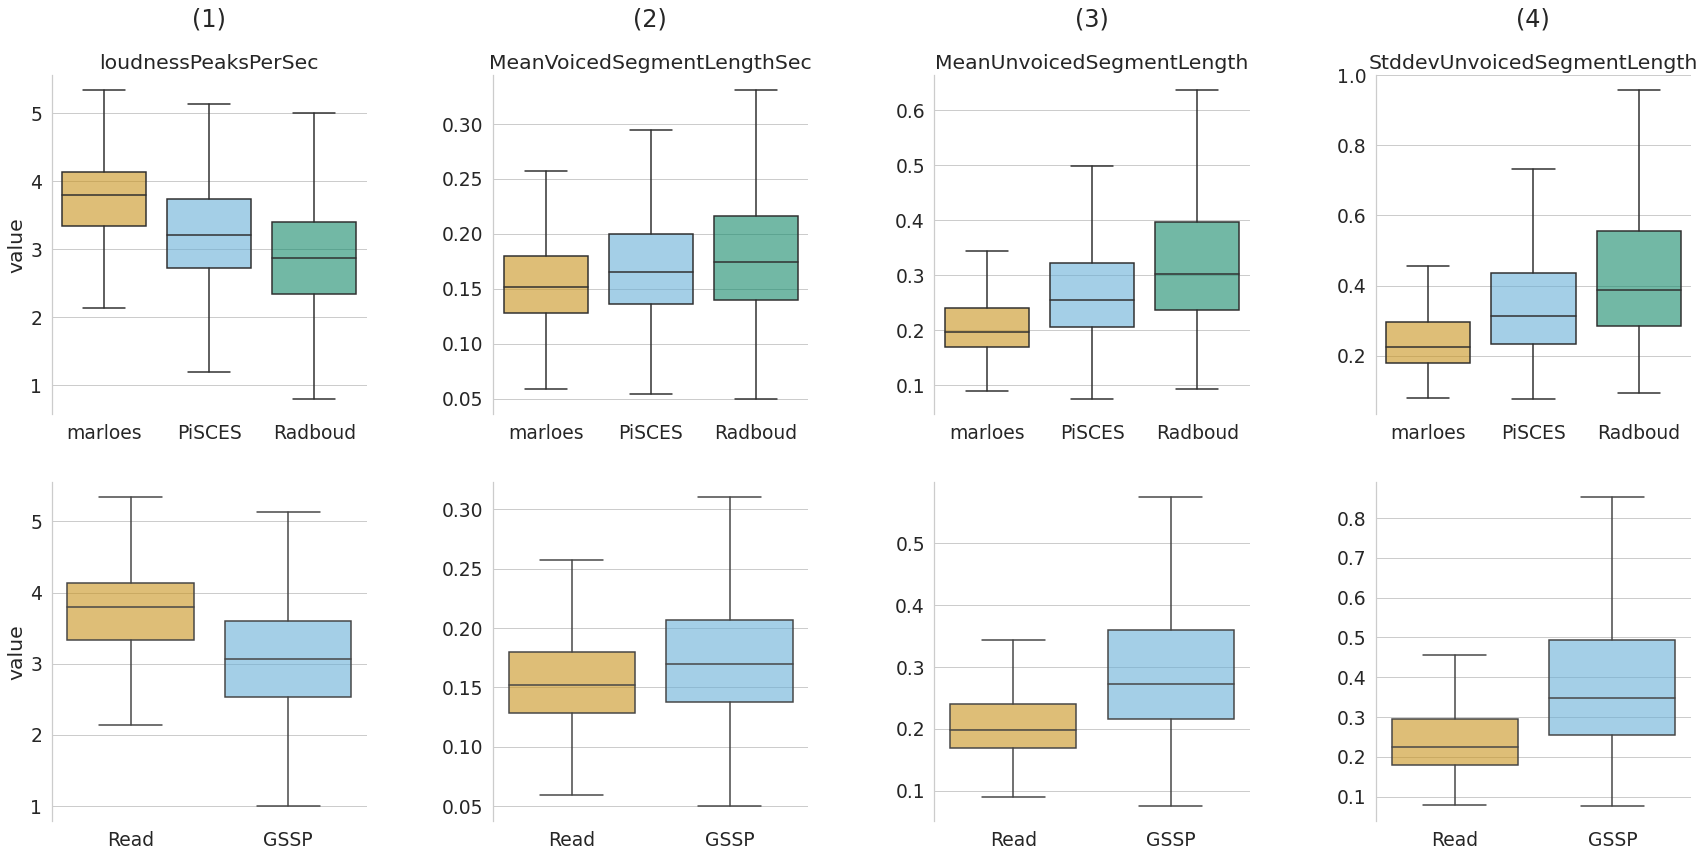

In [22]:
temporal_feat_cols = [
    # "VoicedSegmentsPerSec",
    "loudnessPeaksPerSec",
    "MeanVoicedSegmentLengthSec",
    # "StddevVoicedSegmentLengthSec",
    "MeanUnvoicedSegmentLength",
    "StddevUnvoicedSegmentLength",
]

df_ = df_session_feat.melt(
    id_vars=list(set(df_session_feat.columns).difference(["speech_style", "DB"])),
    var_name="group",
    value_name="group_value",
)#[["group", "group_value"]]

with sns.plotting_context('notebook', font_scale=1.7):
    g = catplot_wrapped(
        temporal_feat_cols, df=df_, x="group_value", row="group", sharex=False,
        palette=color_palette
    )
    for ax in g.axes.flat:
        for patch in ax.patches:
            fc = patch.get_facecolor()
            patch.set_facecolor(mpl.colors.to_rgba(fc, 0.6))

    for i, ax in enumerate(g.axes[0, :], 1):
        ax.annotate(f'({i})', xy=(0.445, 1.2), xycoords='axes fraction', fontsize=24,
                    horizontalalignment='left', verticalalignment='top',
        )

    for ax in g.axes[1, :]:
        ax.set_title('')
    plt.subplots_adjust(hspace=0.2)
    del df_
    plt.show()


#### **Frequency** related features

/home/jonas/.cache/pypoetry/virtualenvs/gssp-27YL4uf1-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


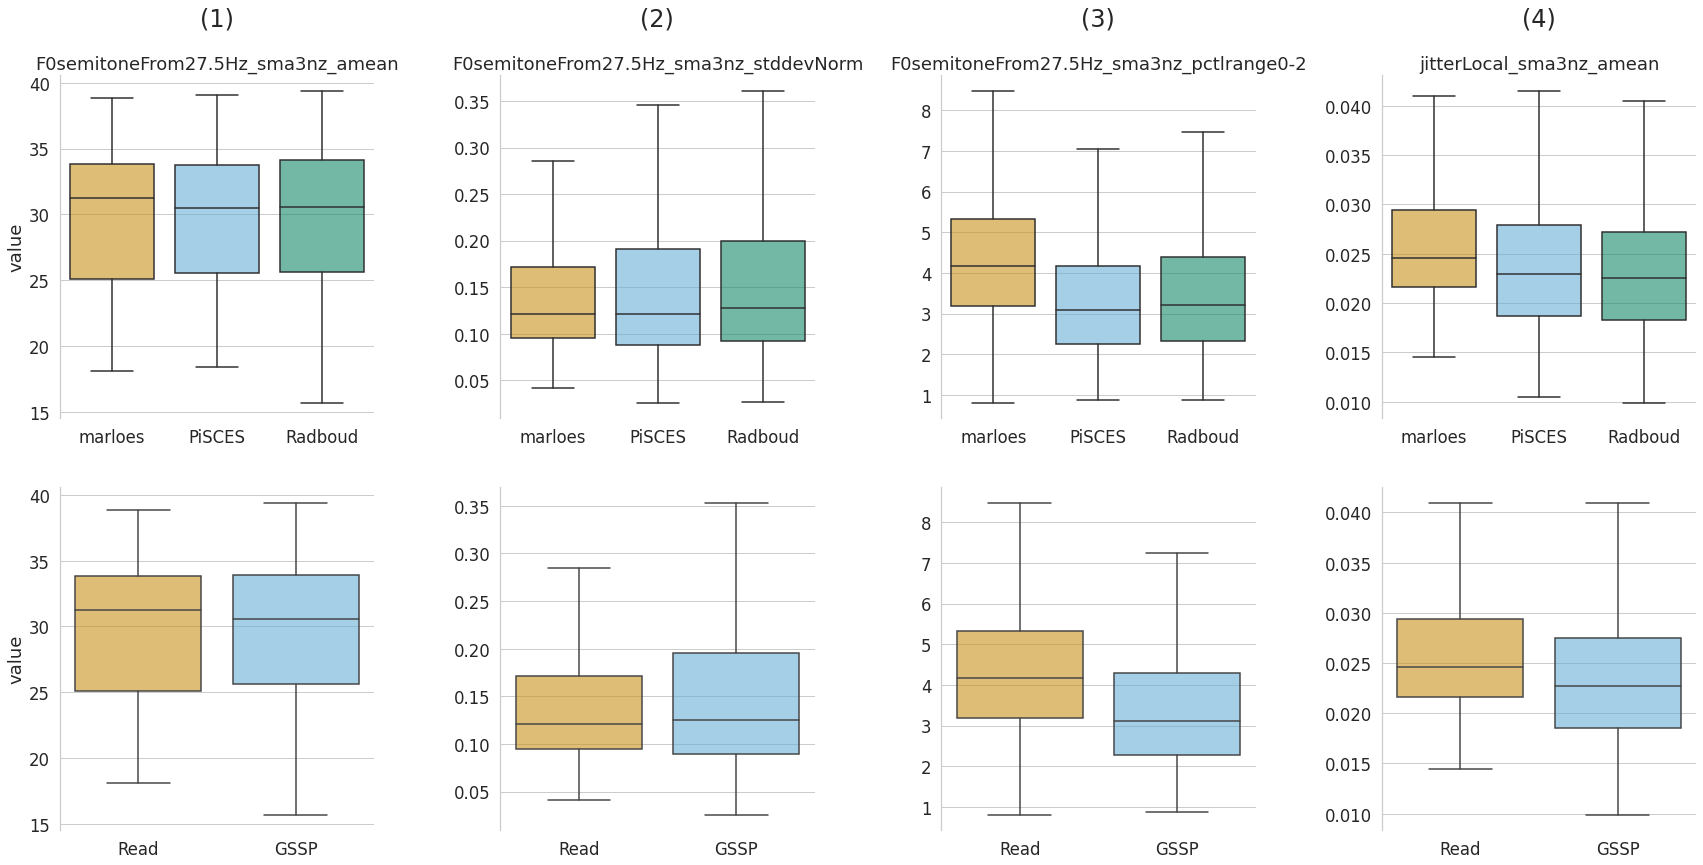

In [23]:
freq_feat_cols = [
    "F0semitoneFrom27.5Hz_sma3nz_amean",
    # "F0semitoneFrom27.5Hz_sma3nz_percentile50.0",
    "F0semitoneFrom27.5Hz_sma3nz_stddevNorm",
    "F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2",
    # "F0semitoneFrom27.5Hz_sma3nz_percentile20.0",
    # "F0semitoneFrom27.5Hz_sma3nz_percentile80.0",
    "jitterLocal_sma3nz_amean",
    # "jitterLocal_sma3nz_stddevNorm",
]


df_ = df_session_feat.melt(
    id_vars=list(set(df_session_feat.columns).difference(["speech_style", "DB"])),
    var_name="group",
    value_name="group_value",
)  # [["group", "group_value"]]

with sns.plotting_context("notebook", font_scale=1.5):
    g = catplot_wrapped(
        freq_feat_cols,
        df=df_,
        x="group_value",
        row="group",
        sharex=False,
        palette=color_palette,
    )
    for ax in g.axes.flat:
        for patch in ax.patches:
            fc = patch.get_facecolor()
            patch.set_facecolor(mpl.colors.to_rgba(fc, 0.6))

    for i, ax in enumerate(g.axes[0, :], 1):
        ax.annotate(
            f"({i})",
            xy=(0.445, 1.2),
            xycoords="axes fraction",
            fontsize=24,
            horizontalalignment="left",
            verticalalignment="top",
        )

    for ax in g.axes[1, :]:
        ax.set_title("")
    plt.subplots_adjust(hspace=0.2)
    del df_
    plt.show()


#### `Amplitude` related features

/home/jonas/.cache/pypoetry/virtualenvs/gssp-27YL4uf1-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


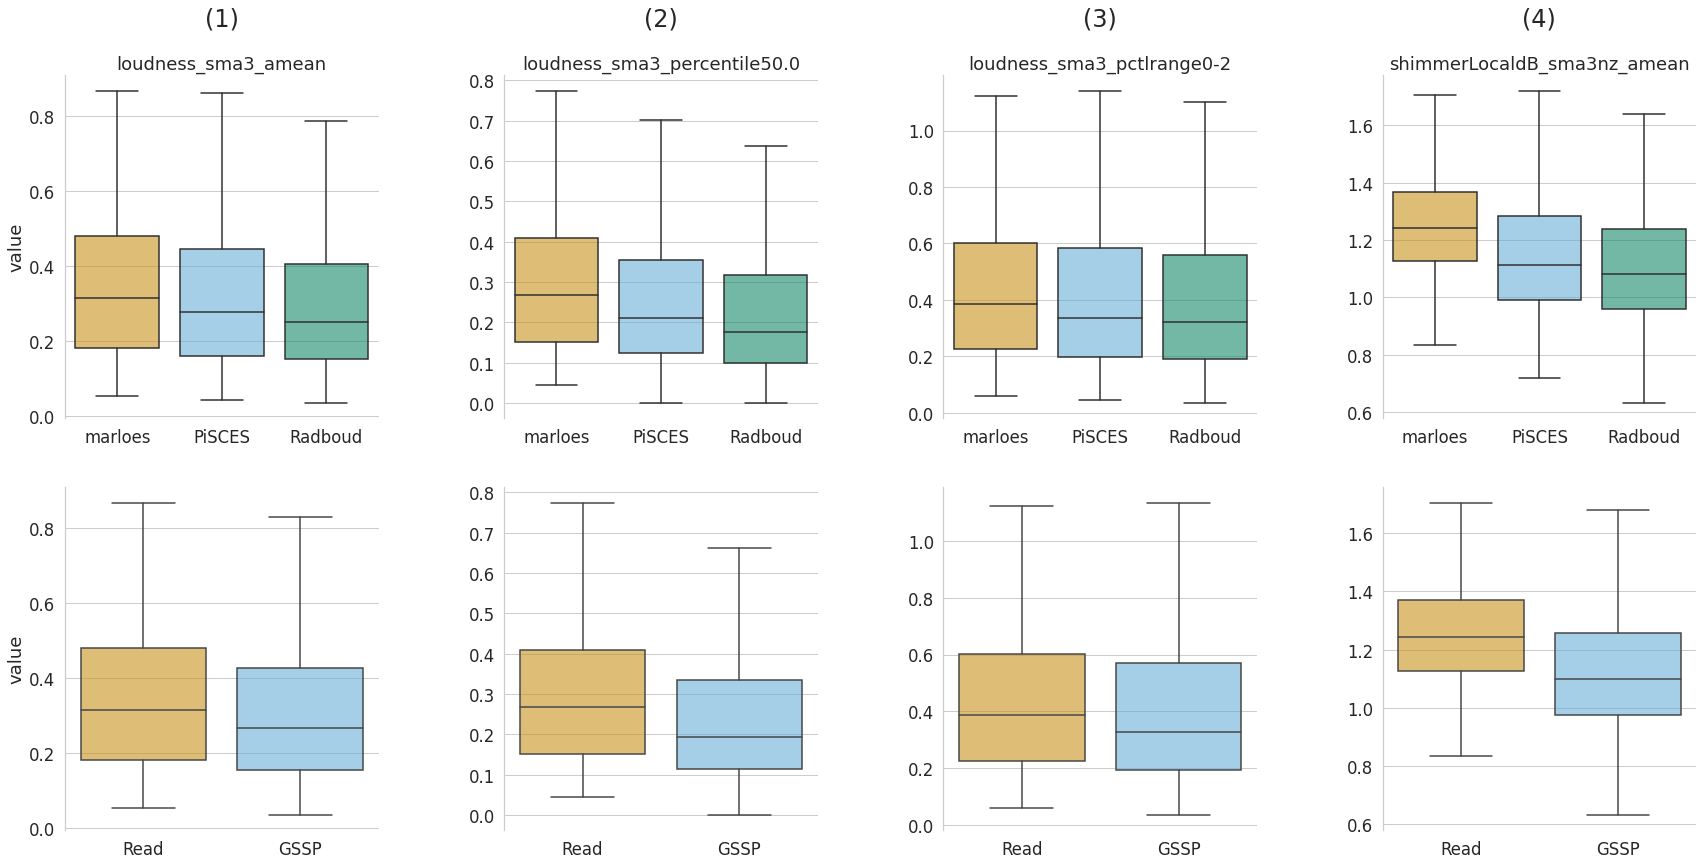

In [25]:
ampl_feat_cols = [
    "loudness_sma3_amean",
    "loudness_sma3_percentile50.0",
    # "loudness_sma3_stddevNorm",
    "loudness_sma3_pctlrange0-2",
    "shimmerLocaldB_sma3nz_amean",
    # "shimmerLocaldB_sma3nz_stddevNorm",
]


df_ = df_session_feat.melt(
    id_vars=list(set(df_session_feat.columns).difference(["speech_style", "DB"])),
    var_name="group",
    value_name="group_value",
)  # [["group", "group_value"]]

with sns.plotting_context("notebook", font_scale=1.5):
    g = catplot_wrapped(
        ampl_feat_cols,
        df=df_,
        x="group_value",
        row="group",
        sharex=False,
        palette=color_palette,
    )

    for ax in g.axes.flat:
        for patch in ax.patches:
            fc = patch.get_facecolor()
            patch.set_facecolor(mpl.colors.to_rgba(fc, 0.6))

    for i, ax in enumerate(g.axes[0, :], 1):
        ax.annotate(
            f"({i})",
            xy=(0.445, 1.2),
            xycoords="axes fraction",
            fontsize=24,
            horizontalalignment="left",
            verticalalignment="top",
        )

    for ax in g.axes[1, :]:
        ax.set_title("")
    plt.subplots_adjust(hspace=0.2)
    del df_
    plt.show()


## Intra user comparison: (mean) normalization per participant

In [26]:
# calculate the mean per participant, per block
# TODO -> maybe use the reference values? and subtract the control / stress block
# from these reference values
temporal_feat_cols = [
    "VoicedSegmentsPerSec",
    "loudnessPeaksPerSec",
    # "MeanVoicedSegmentLengthSec",
    # "StddevVoicedSegmentLengthSec",
    "MeanUnvoicedSegmentLength",
    "StddevUnvoicedSegmentLength",
]

freq_feat_cols = [
    "F0semitoneFrom27.5Hz_sma3nz_amean",
    # "F0semitoneFrom27.5Hz_sma3nz_percentile50.0",
    "F0semitoneFrom27.5Hz_sma3nz_stddevNorm",
    "F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2",
    # "F0semitoneFrom27.5Hz_sma3nz_percentile20.0",
    # "F0semitoneFrom27.5Hz_sma3nz_percentile80.0",
    "jitterLocal_sma3nz_amean",
    # "jitterLocal_sma3nz_stddevNorm",
]

ampl_feat_cols = [
    "loudness_sma3_amean",
    "loudness_sma3_percentile50.0",
    # "loudness_sma3_stddevNorm",
    "loudness_sma3_pctlrange0-2",
    "shimmerLocaldB_sma3nz_amean",
    # "shimmerLocaldB_sma3nz_stddevNorm",
]
feat_cols: List[str] = temporal_feat_cols + freq_feat_cols + ampl_feat_cols

# --------------- on speech_style level ----------------
mean_func = (
    df_session_feat.groupby(["ID", "speech_style"])[feat_cols]
    .mean()
    # .median()
    .reset_index()
)


mean_sgs_func = mean_func[mean_func.speech_style == "SGS"].set_index("ID")
mean_read_func = mean_func[mean_func.speech_style == "Read"].set_index("ID")

mean_read_sgs_func = mean_read_func[feat_cols] - mean_sgs_func[feat_cols]


# ---------------------- on database level ----------------
mean_func = (
    df_session_feat.groupby(["ID", "DB"])[feat_cols]
    .mean()
    # .median()
    .reset_index()
)

mean_marloes_func = mean_func[mean_func.DB == "marloes"].set_index("ID")
mean_radboud_func = mean_func[mean_func.DB == "Radboud"].set_index("ID")
mean_pisces_func = mean_func[mean_func.DB == "PiSCES"].set_index("ID")

mean_db_func = [
    (mean_marloes_func[feat_cols] - mean_radboud_func[feat_cols]).assign(delta="M-R")
]
mean_db_func.append(
    (mean_marloes_func[feat_cols] - mean_pisces_func[feat_cols]).assign(delta="M-P")
)
mean_db_func.append(
    (mean_radboud_func[feat_cols] - mean_pisces_func[feat_cols]).assign(delta="R-P")
)
mean_db_func = pd.concat(mean_db_func)


### `database` delta's **! beautiful figure**

In [39]:
ax = list(g.axes.flat)[0]

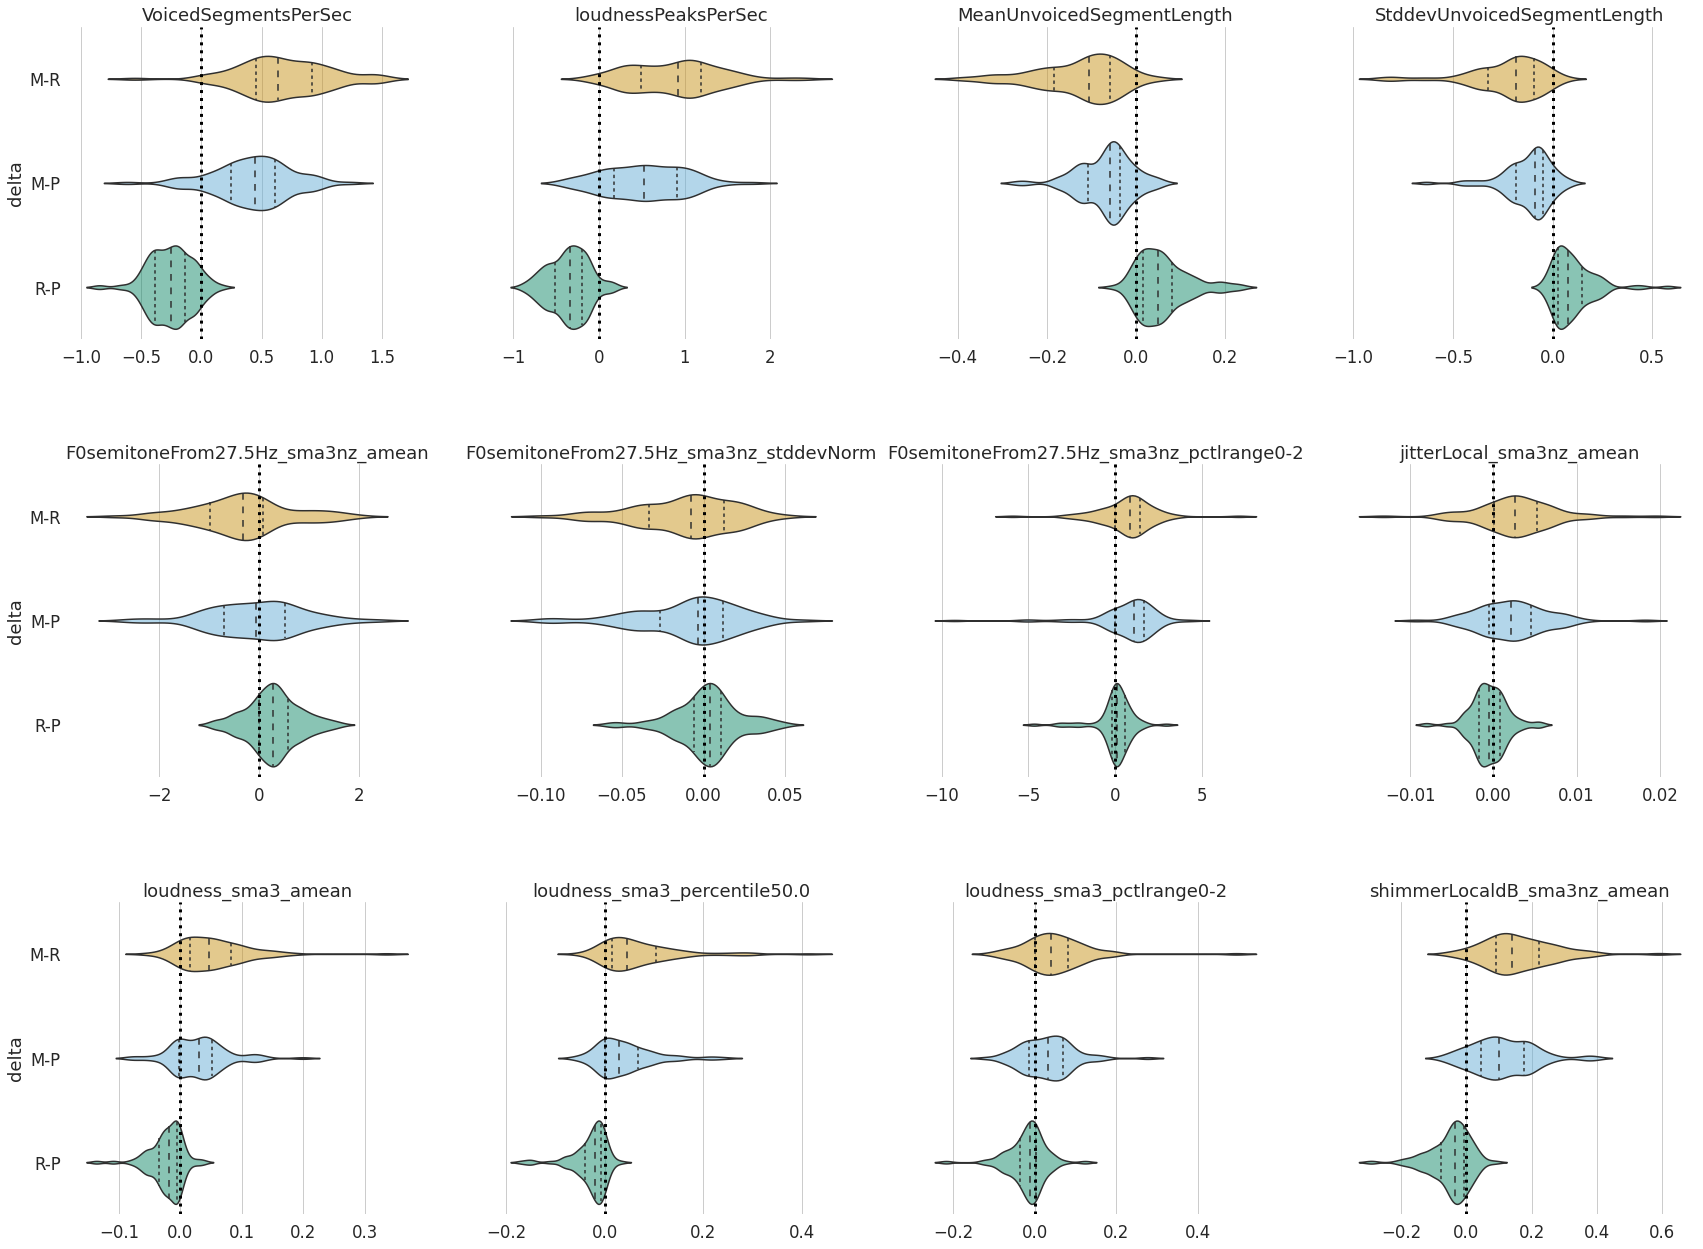

In [51]:
with sns.plotting_context("notebook", font_scale=1.5):
    g = delta_catplot_wrapped(mean_db_func, feat_cols, kind="violin", col_wrap=4, palette=color_palette)
    for ax in g.axes.flat:
        for patch in ax.collections:
            fc = patch.get_facecolor()
            patch.set_facecolor(mpl.colors.to_rgba(fc, 0.5))

    plt.subplots_adjust(wspace=0.2, hspace=0.4)